# Exercise 1 - INF368 - Angela Barriga 

## Question 1

I have selected a VGG16 architecture inspired by this paper: *Karen Simonyan and Andrew Zisserman. Very deep convolutional networks for large-scale image recognition. arXiv preprint arXiv:1409.1556, 2014.*

After making an exhaustive search through the internet, I saw that the architectures with better results, at the moment, are VGGs and ResNet. I decided to implement a VGG because, with some fine tuning it gets a nice accuracy above 90% and because, from my coding perspective, it's easier to understand than a ResNet as the code is simpler.

See architecture in the image below:

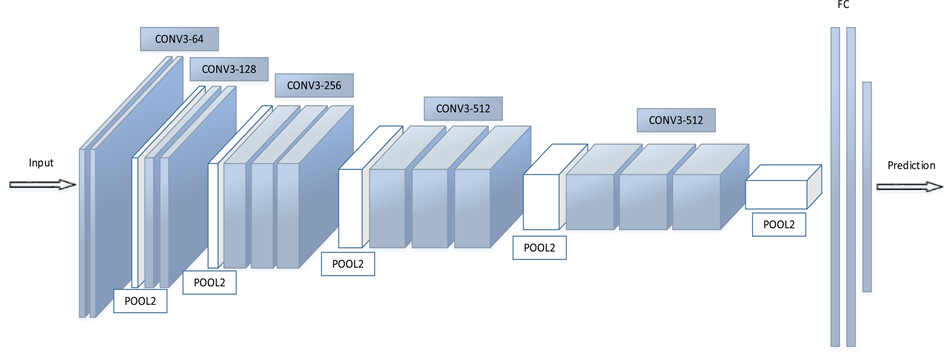

VGG16 has that name because it has 16 deep layers: 13 convolutional stacked in several blocks and 3 fully connected layers. Between the convolutional blocks there are pooling layers. Thanks to the convolutional blocks, the network extracts more and more features from the data the deeper it goes.

My datasets are divided in the usual training set and test set loaded from keras. I also use a validation set formed by 20% of the data from the training set.

After 250 epochs I get an accuracy of:
- Training : 98,06% 
- Validation: 92,95%
- Testing: 92,31%

I improved the accuracy by performing data augmentation (see details of the opeartions applied in the code) and using a learning rate schedule to drop the learning rate. 
Without the learning rate scheduler the average accuracy was ~75%, this technique had a huge impact on the accuracy.

Some references that helped me with this question:

- https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
- https://github.com/geifmany/cifar-vgg
- https://paperswithcode.com/sota/image-classification-on-cifar-10
- https://github.com/jerett/Keras-CIFAR10
- https://www.kaggle.com/c/cifar-10/discussion/40237
- https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1
- https://cv-tricks.com/cnn/understand-resnet-alexnet-vgg-inception/
- Image from: https://file.scirp.org/Html/4-7800353_65406.htm



In [3]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers
from keras.datasets import cifar10
   
#VGG16 architecture

model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=[32,32,3],kernel_regularizer=regularizers.l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(10)) #because we want to classify 10 classes
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)       

In [9]:
#method for reducing learning rate
def lr_scheduler(epoch):
            return learning_rate * (0.5 ** (epoch // lr_drop))

#load data from keras datasets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

#part of train goes to evaluation set
num_train = int(x_train.shape[0] * 0.8) #80% to train
num_val = x_train.shape[0] - num_train #20% to evaluation
mask = list(range(num_train, num_train+num_val))
x_val = x_train[mask]
y_val = y_train[mask]

mask = list(range(num_train))
x_train = x_train[mask]
y_train = y_train[mask]

#training parameters
batch_size = 128
maxepoches = 250
learning_rate = 0.1
lr_decay = 1e-6
lr_drop = 20

reduce_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)

#data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=maxepoches, callbacks=[reduce_lr],
    validation_data=(x_val, y_val), verbose=1)

loss, acc = model.evaluate(x_test, y_test)
print('evaluate loss:%f acc:%f' % (loss, acc))

Epoch 1/250
312/312 [==============================] - 29s 93ms/step - loss: 1.6271 - accuracy: 0.7364 - val_loss: 1.6568 - val_accuracy: 0.7335
Epoch 2/250
312/312 [==============================] - 25s 79ms/step - loss: 1.6562 - accuracy: 0.7331 - val_loss: 1.8320 - val_accuracy: 0.6829
Epoch 3/250
312/312 [==============================] - 25s 80ms/step - loss: 1.6352 - accuracy: 0.7399 - val_loss: 1.6334 - val_accuracy: 0.7360
Epoch 4/250
312/312 [==============================] - 25s 80ms/step - loss: 1.6297 - accuracy: 0.7415 - val_loss: 1.5996 - val_accuracy: 0.7472
Epoch 5/250
312/312 [==============================] - 25s 80ms/step - loss: 1.6352 - accuracy: 0.7396 - val_loss: 1.5422 - val_accuracy: 0.7709
Epoch 6/250
312/312 [==============================] - 25s 79ms/step - loss: 1.6506 - accuracy: 0.7373 - val_loss: 1.7336 - val_accuracy: 0.7105
Epoch 7/250
312/312 [==============================] - 25s 80ms/step - loss: 1.6340 - accuracy: 0.7427 - val_loss: 1.5246 - val_ac

312/312 [==============================] - 25s 79ms/step - loss: 0.4634 - accuracy: 0.9440 - val_loss: 0.6557 - val_accuracy: 0.8993
Epoch 114/250
312/312 [==============================] - 24s 78ms/step - loss: 0.4602 - accuracy: 0.9438 - val_loss: 0.5865 - val_accuracy: 0.9150
Epoch 115/250
312/312 [==============================] - 24s 78ms/step - loss: 0.4598 - accuracy: 0.9444 - val_loss: 0.5837 - val_accuracy: 0.9101
Epoch 116/250
312/312 [==============================] - 25s 79ms/step - loss: 0.4516 - accuracy: 0.9459 - val_loss: 0.6117 - val_accuracy: 0.9072
Epoch 117/250
312/312 [==============================] - 25s 79ms/step - loss: 0.4496 - accuracy: 0.9465 - val_loss: 0.5970 - val_accuracy: 0.9093
Epoch 118/250
312/312 [==============================] - 25s 79ms/step - loss: 0.4528 - accuracy: 0.9441 - val_loss: 0.6301 - val_accuracy: 0.8995
Epoch 119/250
312/312 [==============================] - 25s 79ms/step - loss: 0.4444 - accuracy: 0.9450 - val_loss: 0.5658 - val_ac

Epoch 224/250
312/312 [==============================] - 25s 79ms/step - loss: 0.2727 - accuracy: 0.9811 - val_loss: 0.5083 - val_accuracy: 0.9288
Epoch 225/250
312/312 [==============================] - 24s 77ms/step - loss: 0.2780 - accuracy: 0.9800 - val_loss: 0.5078 - val_accuracy: 0.9292
Epoch 226/250
312/312 [==============================] - 24s 77ms/step - loss: 0.2730 - accuracy: 0.9815 - val_loss: 0.5055 - val_accuracy: 0.9298
Epoch 227/250
312/312 [==============================] - 24s 77ms/step - loss: 0.2759 - accuracy: 0.9807 - val_loss: 0.5061 - val_accuracy: 0.9293
Epoch 228/250
312/312 [==============================] - 24s 76ms/step - loss: 0.2770 - accuracy: 0.9800 - val_loss: 0.5063 - val_accuracy: 0.9295
Epoch 229/250
312/312 [==============================] - 24s 77ms/step - loss: 0.2756 - accuracy: 0.9803 - val_loss: 0.5059 - val_accuracy: 0.9292
Epoch 230/250
312/312 [==============================] - 24s 77ms/step - loss: 0.2722 - accuracy: 0.9814 - val_loss: 0

## Question 2

After inspecting the Plankton dataset in plankton/data-all, I've seen it was quite unbalanced, with some classes with hundred thousands images and others with less than 40 samples.

I've decided, inspired by the Cifar10 dataset, to work with 6000 samples for each class, so I deleted all classes that contained less than 6000 samples. Also, I took away the classes not included in data-65/, because they had non-descriptive names or contained images I didn't want to classify, such as detritus.

Finally, I kept 6000 random images in each class directory, making a total of 23 classes.

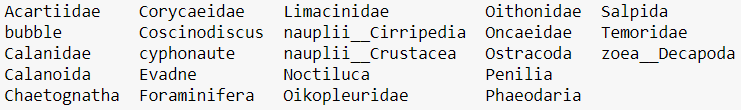

Then I've run the dataset_splitter script to obtain resized train/test/evaluation datasets.

I convert the images to 3 channels by using the parameter "color_mode = rgb" when creating the data generators with flow_from_directory. This way keras handles the conversion and we can use the old weights from ImageNet networks, obtained with 3 channels images.

I've tried to solve this exercise by using the following architectures:

- ResNet50:  it took me a long time to train and I couldn't obtain an evaluation accuracy higher that 0,008. The training accuracy was ok, so the model was overfit. After tuning parameters and modifying the new layers I decided to change to another network since I couldn't improve my results.
- InceptionV3: again, long time, got an accuracy of 49,86% in testing. This was an improvement but I wanted to test with another network and see if I could reach a minimun of 75% accuracy.
- VGG16: with this one I got the best results, not so long to train and an accuracy of 82,66% in testing.

Below you can find first, the code for my best solution: the VGG16. Then the code for InceptionV3.

Some references that helped me with this question:

- https://github.com/WHOIGit/IFCB-CNN/tree/master/keras
- http://noiselab.ucsd.edu/ECE285/FinalProjects/Group16.pdf
- https://stackoverflow.com/questions/52282108/keras-accuracy-drops-while-finetuning-inception
- https://www.kaggle.com/questions-and-answers/56171
- https://datascience.stackexchange.com/questions/48584/neural-network-model-using-transfer-learning-not-learning
- http://keeganhin.es/blog/deeplearning.html

In [3]:
import keras
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.applications.vgg16 import preprocess_input

vgg_model = VGG16( weights='imagenet', include_top=True)
#Output of last fully connected layer not the old softmax output
vgg_out = vgg_model.layers[-2].output   
    
#New softmax for classification of the 23 plankton classes
softmax_layer = keras.layers.core.Dense(23,
                          init='lecun_uniform',
                          activation='softmax')(vgg_out)
#Combine in a new model
tl_model = Model( input=vgg_model.input, output=softmax_layer )
    
#Freeze all layers of VGG16 and compile the model with adam
for layers in vgg_model.layers:
        layers.trainable = False;
    
tl_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#The plankton images are simpler than the CIFAR10 so I make less augmentation
train_datagen =  ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True
  )

#For test and evaluation sets just use the preprocess function from vgg16
test_datagen = ImageDataGenerator(
      preprocessing_function=preprocess_input)

val_datagen = ImageDataGenerator(
      preprocessing_function=preprocess_input)

# Three generators each for train/test/evaluation
# By using color_mode = rgb, keras transform the data from 1 channel (grayscale) to 3 channels rgb
train_generator=train_datagen.flow_from_directory('/home/angelaBR/data/newData/train/', 
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=128,
                                                 class_mode='categorical',
                                                 shuffle=True)

val_generator=val_datagen.flow_from_directory('/home/angelaBR/data/newData/val/',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=128,
                                                 class_mode='categorical',
                                                 shuffle=True)

test_generator=test_datagen.flow_from_directory('/home/angelaBR/data/newData/test/', 
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=128,
                                                 class_mode='categorical',
                                                 shuffle=True)
#Time improves by using 50 steps per epoch
#I select enough epochs to get the best accuracy possible
tl_model.fit_generator(generator=train_generator,
                   steps_per_epoch=50,
                    validation_data=val_generator,
                   epochs=50, validation_steps = 20, verbose=1)

loss, acc = tl_model.evaluate(test_generator)
print('evaluate loss:%f acc:%f' % (loss, acc))

Found 110400 images belonging to 23 classes.
Found 13800 images belonging to 23 classes.
Found 13800 images belonging to 23 classes.
Epoch 1/50
50/50 [==============================] - 80s 2s/step - loss: 1.4158 - accuracy: 0.5575 - val_loss: 0.9909 - val_accuracy: 0.6867
Epoch 2/50
50/50 [==============================] - 75s 1s/step - loss: 0.9496 - accuracy: 0.6934 - val_loss: 0.8093 - val_accuracy: 0.7219
Epoch 3/50
50/50 [==============================] - 74s 1s/step - loss: 0.8923 - accuracy: 0.7112 - val_loss: 0.8549 - val_accuracy: 0.7434
Epoch 4/50
50/50 [==============================] - 75s 1s/step - loss: 0.8289 - accuracy: 0.7378 - val_loss: 0.8811 - val_accuracy: 0.7652
Epoch 5/50
50/50 [==============================] - 75s 2s/step - loss: 0.7918 - accuracy: 0.7455 - val_loss: 0.7524 - val_accuracy: 0.7648
Epoch 6/50
50/50 [==============================] - 75s 1s/step - loss: 0.7748 - accuracy: 0.7478 - val_loss: 0.5742 - val_accuracy: 0.8013
Epoch 7/50
50/50 [=========

In [5]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from keras.models import Sequential

base_model = InceptionV3(weights='imagenet', include_top=False) #include_top=False excludes final FC layer

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x) #new FC layer, random init
predictions = Dense(23, activation='softmax')(x) #new softmax layer
model = Model(input=base_model.input, output=predictions)

for layer in model.layers[:172]:
    layer.trainable = False
for layer in model.layers[172:]:
    layer.trainable = True
    
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen =  ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True
  )

test_datagen = ImageDataGenerator(
      preprocessing_function=preprocess_input)

val_datagen = ImageDataGenerator(
      preprocessing_function=preprocess_input)


train_generator=train_datagen.flow_from_directory('/home/angelaBR/data/newData/train/', 
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=128,
                                                 class_mode='categorical',
                                                 shuffle=True)

val_generator=val_datagen.flow_from_directory('/home/angelaBR/data/newData/val/',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=128,
                                                 class_mode='categorical',
                                                 shuffle=True)

test_generator=test_datagen.flow_from_directory('/home/angelaBR/data/newData/test/',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=128,
                                                 class_mode='categorical',
                                                 shuffle=True)

 

step_size_train=train_generator.n//train_generator.batch_size

model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                    validation_data=val_generator,
                   epochs=5, class_weight='auto', verbose=1)

loss, acc = model.evaluate(test_generator)
print('evaluate loss:%f acc:%f' % (loss, acc))

Found 110400 images belonging to 23 classes.
Found 13800 images belonging to 23 classes.
Found 13800 images belonging to 23 classes.
Epoch 1/5
862/862 [==============================] - 1315s 2s/step - loss: 0.5936 - accuracy: 0.8146 - val_loss: 4.5002 - val_accuracy: 0.2469
Epoch 2/5
862/862 [==============================] - 1306s 2s/step - loss: 0.3417 - accuracy: 0.8918 - val_loss: 3.4227 - val_accuracy: 0.3900
Epoch 3/5
862/862 [==============================] - 1298s 2s/step - loss: 0.2936 - accuracy: 0.9078 - val_loss: 4.3249 - val_accuracy: 0.2867
Epoch 4/5
862/862 [==============================] - 1302s 2s/step - loss: 0.2612 - accuracy: 0.9184 - val_loss: 6.8541 - val_accuracy: 0.3333
Epoch 5/5
108/108 [==============================] - 78s 720ms/step
evaluate loss:1.997637 acc:0.498696
